# Dataset Features

This notebook summarizes the main features observed in the data.

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import detrend1d as dtr

varnames   = ['RAnkAng_X', 'RKneeAng_X', 'RHipAng_X',
              'LAnkAng_X', 'LKneeAng_X', 'LHipAng_X',
              'RHipAng_Y', 'RHipAng_Z', 'LHipAng_Y', 'LHipAng_Z',
              'RAnkAng_Y', 'RKneeAng_Y', 'LAnkAng_Y', 'LKneeAng_Y']
    

## Variable step durations

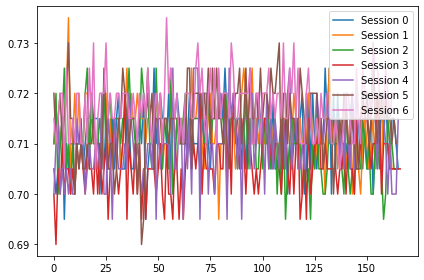

In [28]:
subj       = 1
fnameNPZ   = os.path.join(dtr.dirDATA, f's{subj:03}.npz')
with np.load(fnameNPZ) as z:
    cond   = z['cond']
    tsteps = z['tsteps']
    sess   = z['sess']
    tsess  = z['tsess']

plt.figure()
ax = plt.axes()
for s in np.unique(sess):
    t  = tsteps[ sess==s ]
    dt = np.diff(t)
    ax.plot( dt, label=f'Session {s}' )
ax.legend( loc='upper right' )
plt.tight_layout()
plt.show()
    


## Variable number of steps

In [27]:
nsteps  = [ (sess==s).sum()   for s in np.unique(sess)]

print( nsteps )

[167, 167, 167, 168, 167, 166, 165]


## Variable inter-session duration

In [32]:
tmin  = tsess / 60
dtmin = np.diff( tmin )

print( 'Session start times (min):' )
print( np.round(tmin, 1) )
print()
print( 'Start-to-start durations (min)' )
print( np.round( dtmin, 1) )


Session start times (min):
[ 0.   8.1 17.4 26.  36.9 46.  57.2]

Start-to-start durations (min)
[ 8.1  9.3  8.6 10.9  9.1 11.2]


## Linear trends within sessions

[[-26.80398347 -58.1950889  -25.05118923]
 [-26.16886195 -56.30798982 -24.45020944]
 [-24.99711198 -55.20608859 -23.19088557]
 [-26.91671311 -57.24118703 -25.14227565]
 [-28.40879226 -58.85908692 -26.66794991]
 [-28.25060479 -60.11725966 -26.58700737]
 [-27.34771145 -58.5375269  -25.73787142]]


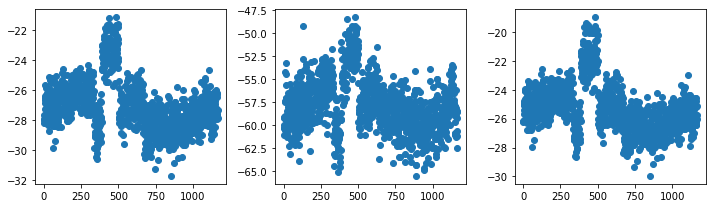

In [42]:
subj       = 1

varname    = 'RKneeAng_X'
fnameNPZ   = os.path.join(dtr.dirDATA, f's{subj:03}.npz')
with np.load(fnameNPZ) as z:
    cond   = z['cond']
    tsess  = z['tsess']
    tsteps = z['tsteps']
    sess   = z['sess']
    y      = z[varname]


# calculate session means at individual points:

inds = [0, 99, 199]
yy   = np.array( [y[sess==s].mean(axis=0)[inds]  for s in np.unique(sess)] )

print(yy)

    
    
# plot:
fig,axs = plt.subplots( 1, 3, figsize=(10,3) )
ax0,ax1,ax2 = axs

for ax,ind in zip(axs, inds):
    yy = y[:,ind]
    tt = tsteps[]
    ax.plot(, 'o')


# plt.suptitle( f'Subject {subj}, Session {cond[s]}')
plt.tight_layout()
plt.show()

## Linear trends across sessions